In [58]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
# Get nicer looking plots than default
plt.style.use('bmh')
# Timer to measure the performance of methods
from time import time
# Import scipy to get sparse arrays
import scipy
from scipy import sparse
from scipy.sparse import linalg

In [59]:
def randomwalker(N, start, L, function):
    steps    = function(N)
    position = start + L*steps.sum()
    return position
randomwalker = np.vectorize(randomwalker)

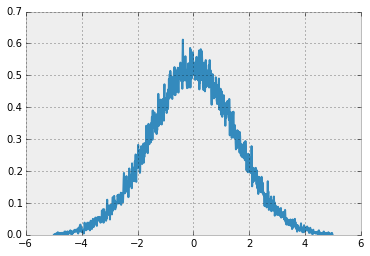

In [75]:
Nwalkers = 100000
T        = 1
L        = 0.1
dtrandom = L**2/2
Nsteps   = int(T/dtrandom)
function = lambda N : np.where(np.random.rand(N) < 0.5, -1, 1)

walkers  = randomwalker(Nsteps, 2*np.random.random(Nwalkers)-1, L, function)

hist, bins = np.histogram(walkers, bins = np.linspace(-5, 5, 1000))
plt.plot(bins[:-1], hist/500)

Time:  0.4377899169921875


/Users/nordam/.pyenv/versions/3.4.2/lib/python3.4/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(-0.2, 1.2)

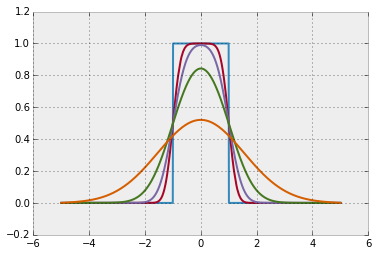

In [61]:
T  = 1
dt = 5e-5
Nt = int(T/dt)
Nx = 1000
X0 = -5
X1 = 5
X  = np.linspace(X0, X1, Nx)
dx = X[1] - X[0]

U  = np.zeros((Nt, Nx))

#Stability condition
#print(dt/dx**2)

# Initial condition - top hat profile
U[0,4*Nx/10:6*Nx/10] = 1

# Set up matrix A, now using sparse array
alpha = dt/dx**2
A = np.diag(alpha*np.ones(Nx-1), -1) + np.diag((1-2*alpha)*np.ones(Nx), 0) + np.diag(alpha*np.ones(Nx-1), 1)
A = sparse.dia_matrix(A)
tic = time()
for t in range(1, Nt):
    U[t,:] = A.dot(U[t-1,:])
toc = time()
print('Time: ', toc - tic)

plt.plot(X, U[0,:])
plt.plot(X, U[500,:])
plt.plot(X, U[1500,:])
plt.plot(X, U[5000,:])
plt.plot(X, U[19999,:])
plt.ylim(-0.2, 1.2)

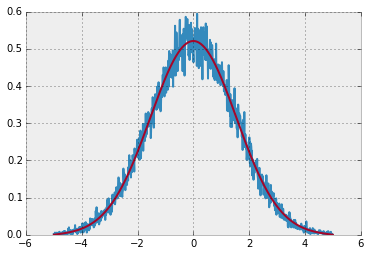

In [65]:
plt.plot(bins[:-1], hist/500)
plt.plot(X, U[19999,:])

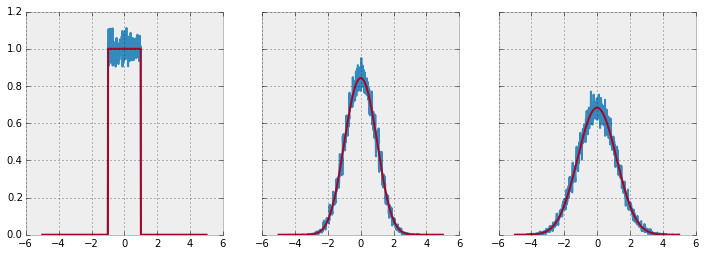

In [71]:
fig, ax = plt.subplots(1,3, sharey = True, figsize = (12, 4))

T = 0/20
walkers  = randomwalker(int(T/dtrandom), 2*np.random.random(Nwalkers)-1, L, function)
hist, bins = np.histogram(walkers, bins = np.linspace(-5, 5, 1000))
ax[0].plot(bins[:-1], hist/500)
ax[0].plot(X, U[0,:])

T = 5/20
walkers  = randomwalker(int(T/dtrandom), 2*np.random.random(Nwalkers)-1, L, function)
hist, bins = np.histogram(walkers, bins = np.linspace(-5, 5, 1000))
ax[1].plot(bins[:-1], hist/500)
ax[1].plot(X, U[5000,:])

T = 10/20
walkers  = randomwalker(int(T/dtrandom), 2*np.random.random(Nwalkers)-1, L, function)
hist, bins = np.histogram(walkers, bins = np.linspace(-5, 5, 1000))
ax[2].plot(bins[:-1], hist/500)
ax[2].plot(X, U[10000,:])

/Users/nordam/.pyenv/versions/3.4.2/lib/python3.4/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordam/.pyenv/versions/3.4.2/lib/python3.4/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordam/.pyenv/versions/3.4.2/lib/python3.4/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


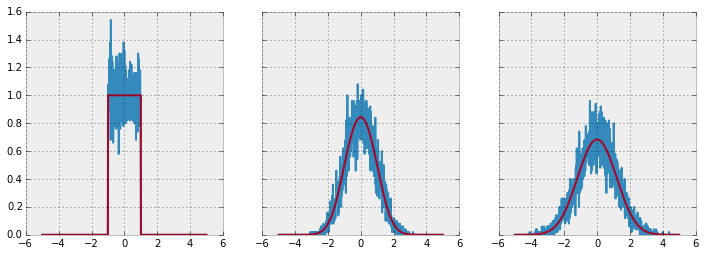

In [73]:
fig, ax = plt.subplots(1,3, sharey = True, figsize = (12, 4))
Nwalkers = 1e4

T = 0/20
walkers  = randomwalker(int(T/dtrandom), 2*np.random.random(Nwalkers)-1, L, function)
hist, bins = np.histogram(walkers, bins = np.linspace(-5, 5, 1000))
ax[0].plot(bins[:-1], hist/50)
ax[0].plot(X, U[0,:])

T = 5/20
walkers  = randomwalker(int(T/dtrandom), 2*np.random.random(Nwalkers)-1, L, function)
hist, bins = np.histogram(walkers, bins = np.linspace(-5, 5, 1000))
ax[1].plot(bins[:-1], hist/50)
ax[1].plot(X, U[5000,:])

T = 10/20
walkers  = randomwalker(int(T/dtrandom), 2*np.random.random(Nwalkers)-1, L, function)
hist, bins = np.histogram(walkers, bins = np.linspace(-5, 5, 1000))
ax[2].plot(bins[:-1], hist/50)
ax[2].plot(X, U[10000,:])

/Users/nordam/.pyenv/versions/3.4.2/lib/python3.4/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordam/.pyenv/versions/3.4.2/lib/python3.4/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/nordam/.pyenv/versions/3.4.2/lib/python3.4/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


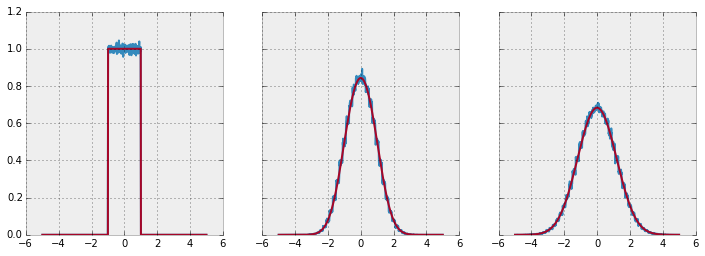

In [74]:
fig, ax = plt.subplots(1,3, sharey = True, figsize = (12, 4))
Nwalkers = 1e6

T = 0/20
walkers  = randomwalker(int(T/dtrandom), 2*np.random.random(Nwalkers)-1, L, function)
hist, bins = np.histogram(walkers, bins = np.linspace(-5, 5, 1000))
ax[0].plot(bins[:-1], hist/5000)
ax[0].plot(X, U[0,:])

T = 5/20
walkers  = randomwalker(int(T/dtrandom), 2*np.random.random(Nwalkers)-1, L, function)
hist, bins = np.histogram(walkers, bins = np.linspace(-5, 5, 1000))
ax[1].plot(bins[:-1], hist/5000)
ax[1].plot(X, U[5000,:])

T = 10/20
walkers  = randomwalker(int(T/dtrandom), 2*np.random.random(Nwalkers)-1, L, function)
hist, bins = np.histogram(walkers, bins = np.linspace(-5, 5, 1000))
ax[2].plot(bins[:-1], hist/5000)
ax[2].plot(X, U[10000,:])